# Adaptive histogram

This type of histogram automatically adapts bins when new values are added. Note that only fixed-width continuous binning scheme is currently supported.

In [1]:
# Necessary import evil
import physt
from physt import h1, h2, histogramdd, adaptive_histogram_1d
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

In [2]:
# Create an empty histogram
h = adaptive_histogram_1d(bin_width=10, name="People height", axis_name="cm")
h

AdaptiveHistogram1D(bins=0, total=0.0)

## Adding single values

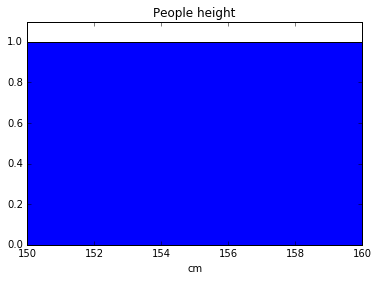

In [3]:
# Add a first value
h.fill(157)
h.plot();

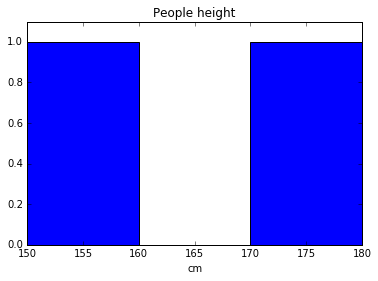

In [4]:
# Add a second value
h.fill(173)
h.plot();

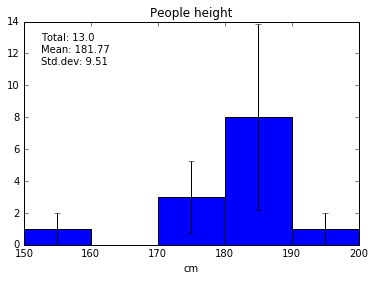

In [5]:
# Add a few more values, including weights
h.fill(173, 2)
h.fill(186, 5)
h.fill(188, 3)
h.fill(193, 1)
h.plot(errors=True, stats_box=True);

## Adding multiple values at once

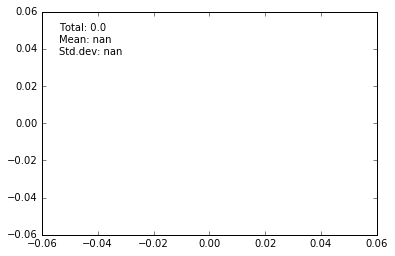

In [6]:
ha = adaptive_histogram_1d(bin_width=10)
ha.plot(stats_box=True)

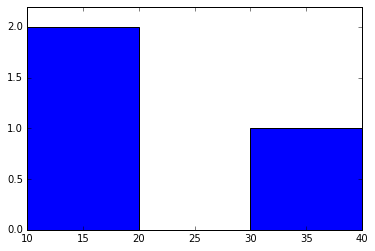

In [7]:
# Beginning
ha.fill_n([10, 11, 34])
ha.plot()

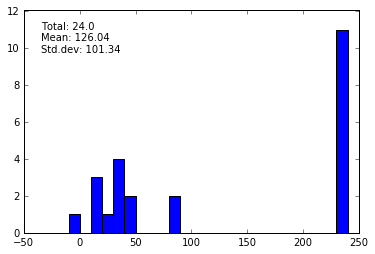

In [20]:
# Add a distant value
ha.fill_n([234], weights=10)
ha.plot(stats_box=True)

In [27]:
values = np.random.normal(130, 20, 1000000)

In [28]:
%%time
# Add lots of values (no loop in Python hopefully)
hn = adaptive_histogram_1d(bin_width=10)
hn.fill_n(values)
# ha.plot()

CPU times: user 201 ms, sys: 7.05 ms, total: 208 ms
Wall time: 207 ms


In [29]:
%%time
# Comparison with Python loop
hn = adaptive_histogram_1d(bin_width=10)
for value in values:
    hn.fill(value)

CPU times: user 6.14 s, sys: 316 µs, total: 6.14 s
Wall time: 6.14 s
